In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#데이터가져오기
product = pd.read_csv("D:/Digital_Trend_Analyzer/Product.csv")
search1 = pd.read_csv("D:/Digital_Trend_Analyzer/Search1.csv")
search2 = pd.read_csv("D:/Digital_Trend_Analyzer/Search2.csv")
custom = pd.read_csv("D:/Digital_Trend_Analyzer/Custom.csv")
session = pd.read_csv("D:/Digital_Trend_Analyzer/Session.csv")
master = pd.read_csv("D:/Digital_Trend_Analyzer/Master.csv")

In [6]:
print('product shape : ', product.shape)
print('search1 shape : ', search1.shape)
print('search2 shape : ', search2.shape)
print('custom shape : ', custom.shape)
print('session shape : ', session.shape)
print('master shape : ', master.shape)

product shape :  (5024906, 8)
search1 shape :  (2884943, 4)
search2 shape :  (8051172, 3)
custom shape :  (671679, 3)
session shape :  (2712907, 9)
master shape :  (847652, 5)


In [7]:
product.head()


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [8]:
search1.head()


,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [9]:
search2.head()


,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


In [10]:
custom.head()


,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [11]:
session.head()


,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


In [12]:
master.head()


,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


In [13]:
def explore_data_1(data) :
    print(data.dtypes.value_counts())
    numeric = data._get_numeric_data().columns
    categorical = data.select_dtypes(exclude=["number"]).columns
    print('* Numeric columns : ')
    print(numeric)
    print('* Categorical columns : ')
    print(categorical)
    print('* Num of categories in categorial colums : ')
    print(data.select_dtypes('object').apply(pd.Series.nunique, axis=0))

print('[product]')
explore_data_1(product)

print('\n[search1]')
explore_data_1(search1)

print('\n[search2]')
explore_data_1(search2)

print('\n[custom]')
explore_data_1(custom)

print('\n[session]')
explore_data_1(session)

print('\n[master]')
explore_data_1(master)

#df = pd.get_dummies(df)
#print('Training Features Shape :', df.shape)

[product]
int64     4
object    4
dtype: int64
* Numeric columns : 
Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C'], dtype='object')
* Categorical columns : 
Index(['PD_ADD_NM', 'PD_BRA_NM', 'PD_BUY_AM', 'PD_BUY_CT'], dtype='object')
* Num of categories in categorial colums : 
PD_ADD_NM    759548
PD_BRA_NM     22716
PD_BUY_AM     17731
PD_BUY_CT       361
dtype: int64

[search1]
int64     3
object    1
dtype: int64
* Numeric columns : 
Index(['CLNT_ID', 'SESS_ID', 'SEARCH_CNT'], dtype='object')
* Categorical columns : 
Index(['KWD_NM'], dtype='object')
* Num of categories in categorial colums : 
KWD_NM    81539
dtype: int64

[search2]
object    2
int64     1
dtype: int64
* Numeric columns : 
Index(['SESS_DT'], dtype='object')
* Categorical columns : 
Index(['KWD_NM', 'SEARCH_CNT'], dtype='object')
* Num of categories in categorial colums : 
KWD_NM        84607
SEARCH_CNT     1436
dtype: int64

[custom]
int64     2
object    1
dtype: int64
* Numeric columns : 
Index(['CLNT_ID', 'CLNT_A

In [14]:
'''print(df['TARGET'].value_counts())
df['TARGET'].astype(int).plot.hist()
'''

"print(df['TARGET'].value_counts())\ndf['TARGET'].astype(int).plot.hist()\n"

In [15]:
merge1 = pd.merge(product, master)
merge1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
1,4350334,2023661,77,642112,색상:엔젤 / 1개,바비브라운,"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
2,5172356,4714565,47,642112,색상:카바나,[바비브라운],"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
3,5444959,6843465,24,642112,색상:워터멜론 / 1개,바비브라운,"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
4,5461276,7896792,53,642112,색상:워터멜론 / 1개,바비브라운,"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터


In [16]:
merge1 = merge1.drop(['HITS_SEQ','PD_C', 'PD_ADD_NM', 'PD_BRA_NM', 'PD_NM'], axis=1)
merge1.head()

,CLNT_ID,SESS_ID,PD_BUY_AM,PD_BUY_CT,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4139680,7605037,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
1,4350334,2023661,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
2,5172356,4714565,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
3,5444959,6843465,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
4,5461276,7896792,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터


In [17]:
merge2 = pd.merge(merge1, session)
merge2.head()

,CLNT_ID,SESS_ID,PD_BUY_AM,PD_BUY_CT,CLAC1_NM,CLAC2_NM,CLAC3_NM,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,4139680,7605037,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,1,20180526,21.0,902,desktop,Seoul,Seoul
1,4139680,7605037,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,1,20180526,21.0,902,desktop,Seoul,Seoul
2,4139680,7605037,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,1,20180526,21.0,902,desktop,Seoul,Seoul
3,4139680,7605037,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,1,20180526,21.0,902,desktop,Seoul,Seoul
4,4139680,7605037,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,1,20180526,21.0,902,desktop,Seoul,Seoul


In [18]:
merge2 = merge2.drop(['SESS_ID', 'SESS_SEQ','TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V'], axis=1)
merge2.head()

,CLNT_ID,PD_BUY_AM,PD_BUY_CT,CLAC1_NM,CLAC2_NM,CLAC3_NM,SESS_DT,DVC_CTG_NM,ZON_NM,CITY_NM
0,4139680,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180526,desktop,Seoul,Seoul
1,4139680,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180526,desktop,Seoul,Seoul
2,4139680,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180526,desktop,Seoul,Seoul
3,4139680,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180526,desktop,Seoul,Seoul
4,4139680,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180526,desktop,Seoul,Seoul


In [19]:
merge3 = pd.merge(merge2, custom)
merge3.head()

,CLNT_ID,PD_BUY_AM,PD_BUY_CT,CLAC1_NM,CLAC2_NM,CLAC3_NM,SESS_DT,DVC_CTG_NM,ZON_NM,CITY_NM,CLNT_GENDER,CLNT_AGE
0,4350334,"39,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180827,mobile,Seoul,Seoul,F,30
1,4350334,"80,000",1,화장품/뷰티케어,메이크업,BB/파운데이션/컴팩트류,20180827,mobile,Seoul,Seoul,F,30
2,4350334,"127,000",1,패션잡화,여성화,여성쪼리,20180827,mobile,Seoul,Seoul,F,30
3,4350334,"40,000",1,화장품/뷰티케어,메이크업,BB/파운데이션/컴팩트류,20180614,mobile,Seoul,Seoul,F,30
4,4350334,"40,000",1,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,20180612,mobile,Seoul,Seoul,F,30


In [20]:
purchase = merge3
heavy_light_users = purchase['CLNT_ID'].value_counts()
print(heavy_light_users)

4736937    3154
2075522    1827
1662720    1587
4964593    1262
748826     1210
5302905    1150
5142305    1030
4006944     956
5448721     828
6366359     782
6072971     722
4931190     702
5628642     678
1616624     677
3137116     661
3447474     644
2426355     643
2436343     617
3858367     616
4123774     523
3095344     507
4260668     459
1141526     447
97459       421
3803223     400
235570      381
5091280     378
3846487     353
1012545     351
2771792     346
           ... 
1233150       1
4921820       1
4356417       1
4033902       1
6240788       1
4993916       1
6251612       1
5117286       1
3052643       1
2933549       1
3719764       1
1386405       1
5151962       1
2439159       1
4646747       1
1186240       1
1153456       1
4141108       1
20740         1
6089017       1
4087111       1
3399128       1
6276130       1
3904593       1
1654981       1
964825        1
4079642       1
2408326       1
1367850       1
3760737       1
Name: CLNT_ID, Length: 6

In [21]:
for i in range(4) : 
    print('\n* Heavy customer %d'%i)
    print(purchase[purchase['CLNT_ID']==heavy_light_users.index[i]]['CLAC1_NM'].value_counts())


* Heavy customer 0
여성의류    2634
남성의류     520
Name: CLAC1_NM, dtype: int64

* Heavy customer 1
패션잡화        1761
화장품/뷰티케어      38
남성의류          11
여성의류           7
스포츠패션          6
식기/조리기구        2
퍼스널케어          1
생활/주방가전        1
Name: CLAC1_NM, dtype: int64

* Heavy customer 2
화장품/뷰티케어    706
식기/조리기구     324
건강식품        244
패션잡화        162
스포츠패션       116
생활/주방가전      30
과일            3
헬스/피트니스       1
음료            1
Name: CLAC1_NM, dtype: int64

* Heavy customer 3
패션잡화         505
여성의류         412
유아동의류        202
화장품/뷰티케어      53
스포츠패션         27
속옷/양말/홈웨어     26
시즌스포츠         15
출산/육아용품       12
남성의류           8
식기/조리기구        2
Name: CLAC1_NM, dtype: int64


In [22]:
for i in range(20) : 
    print('\n* Light customer %d'%i)
    print(purchase[purchase['CLNT_ID']==heavy_light_users.index[len(heavy_light_users)-(i+1)]]['CLAC1_NM'].value_counts())


* Light customer 0
건강식품    1
Name: CLAC1_NM, dtype: int64

* Light customer 1
패션잡화    1
Name: CLAC1_NM, dtype: int64

* Light customer 2
여성의류    1
Name: CLAC1_NM, dtype: int64

* Light customer 3
식기/조리기구    1
Name: CLAC1_NM, dtype: int64

* Light customer 4
침구/수예    1
Name: CLAC1_NM, dtype: int64

* Light customer 5
과일    1
Name: CLAC1_NM, dtype: int64

* Light customer 6
완구    1
Name: CLAC1_NM, dtype: int64

* Light customer 7
스포츠패션    1
Name: CLAC1_NM, dtype: int64

* Light customer 8
남성의류    1
Name: CLAC1_NM, dtype: int64

* Light customer 9
출산/육아용품    1
Name: CLAC1_NM, dtype: int64

* Light customer 10
아웃도어/레저    1
Name: CLAC1_NM, dtype: int64

* Light customer 11
남성의류    1
Name: CLAC1_NM, dtype: int64

* Light customer 12
세제/위생    1
Name: CLAC1_NM, dtype: int64

* Light customer 13
스포츠패션    1
Name: CLAC1_NM, dtype: int64

* Light customer 14
유아동의류    1
Name: CLAC1_NM, dtype: int64

* Light customer 15
출산/육아용품    1
Name: CLAC1_NM, dtype: int64

* Light customer 16
남성의류    1
Name: 

In [23]:
for column_idx in range(1, purchase.shape[1]) :
    print(purchase.iloc[:, column_idx].value_counts())
    #purchase.iloc[:, column_idx].value_counts().plot.bar()
    #plt.show()

9,900        76173
39,000       75787
10,000       69154
29,000       68365
15,000       63798
19,000       59755
30,000       52474
49,000       49790
35,000       45819
19,900       42704
12,000       41526
25,000       41379
9,000        39026
59,000       39014
45,000       37356
7,000        34986
5,000        34481
69,000       34255
79,000       33639
20,000       33330
7,900        29898
8,900        27950
14,900       27706
22,000       25849
12,900       25018
29,900       24665
19,800       24405
42,000       23420
28,000       23126
43,000       23056
             ...  
47,870           1
385,800          1
518,880          1
186,550          1
240,010          1
127,840          1
37,360           1
705,580          1
35,130           1
516,900          1
993,100          1
237,100          1
69,340           1
529,920          1
237,700          1
1,219,400        1
83,080           1
971,650          1
980,100          1
82,350           1
208,170          1
783,400     

F    3491522
M     497065
Name: CLNT_GENDER, dtype: int64
30    1751416
40    1574966
20     354299
50     252729
60      37308
10      12143
70       5471
80        255
Name: CLNT_AGE, dtype: int64



*  PD_BUY_AM


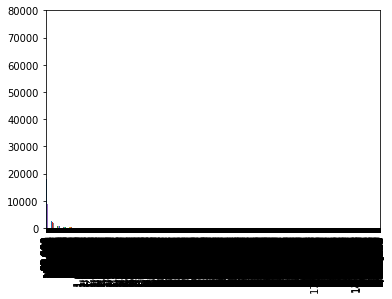


*  PD_BUY_CT


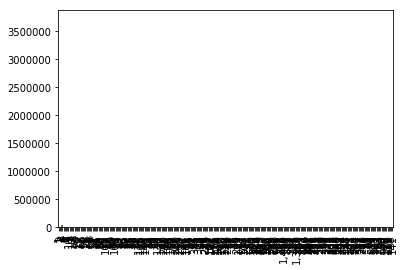


*  CLAC1_NM


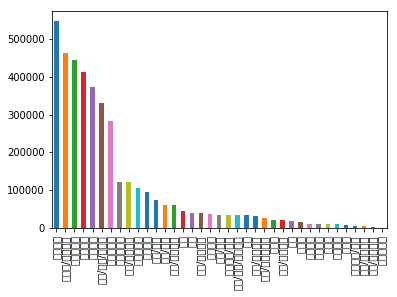


*  CLAC2_NM


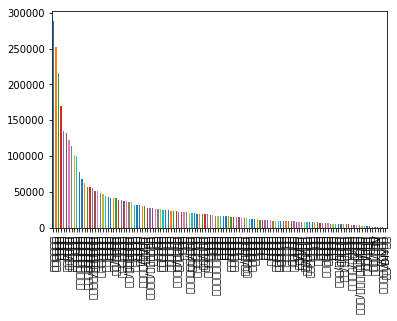


*  CLAC3_NM


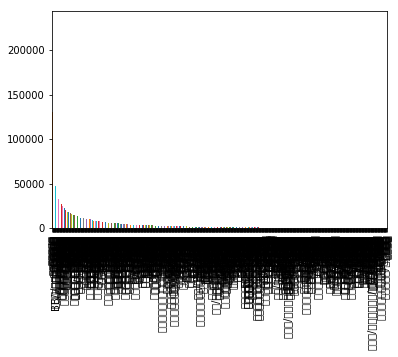


*  SESS_DT


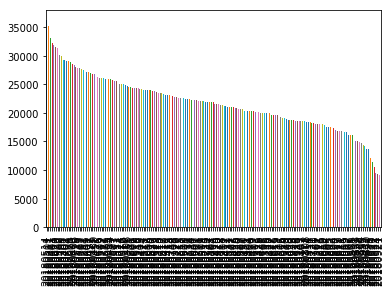


*  DVC_CTG_NM


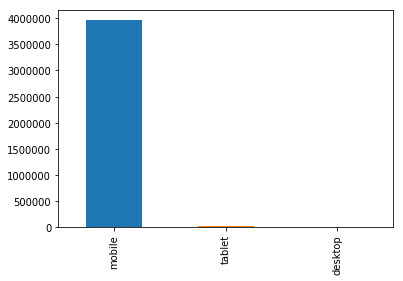


*  ZON_NM


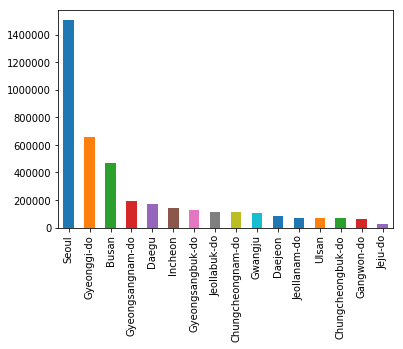


*  CITY_NM


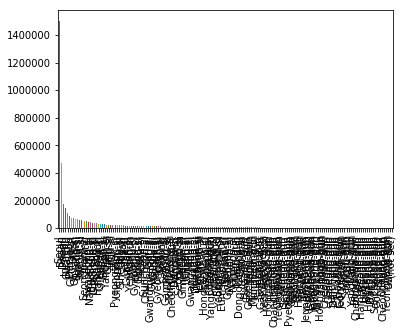


*  CLNT_GENDER


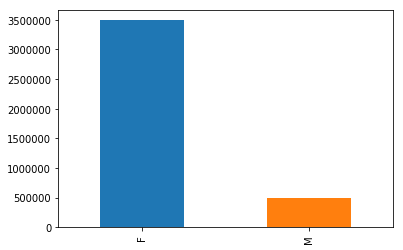


*  CLNT_AGE


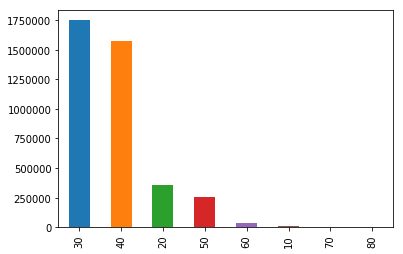

In [24]:
for column_idx in range(1, purchase.shape[1]) :
    print('\n* ', purchase.dtypes.index[column_idx])
    purchase.iloc[:, column_idx].value_counts().plot.bar()
    plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

In [28]:
product_master = pd.merge(product,master)

In [ ]:
custom_master_search1 = pd.merge(custom_master,search1)